In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import math
import urllib.parse
import urllib.request
import json

In [13]:
# Use this if you want to download a file manually (trim it for ease)
"""
HH: Current hour
DR: Duur van de neerslag (in 0.1 uur) per uurvak / Precipitation duration (in 0.1 hour) during the hourly division
RH: Uursom van de neerslag (in 0.1 mm) (-1 voor <0.05 mm) / Hourly precipitation amount (in 0.1 mm) (-1 for <0.05 mm)
"""
deBilt = pd.read_csv('data\uurgeg_260_2011-2020.csv', parse_dates=['YYYYMMDD'], comment='#', usecols=['YYYYMMDD','HH','RH','DR'])

deBilt.drop(deBilt[(deBilt['RH'] == -1) | (deBilt['RH'] == 0) | (deBilt['RH'] == '     ')].index, inplace=True)
deBilt['DR'] = deBilt['DR'].str.strip()
deBilt['DR'] = pd.to_numeric(deBilt['DR'], 'coerce').fillna(0).astype(int)
deBilt.to_csv ('data\generated\uurgeg_260_2011-2020.csv', index = False, header=True)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 4-5: truncated \uXXXX escape (<ipython-input-13-57dd564bdf6e>, line 7)

In [14]:
# Use this if you want to select a lot more data (trim it for ease)
url = "http://projects.knmi.nl/klimatologie/uurgegevens/getdata_uur.cgi"
postData = {
    'start':'1971010101',
    'end':'2021010124',
    'stns': '240',
    'vars':'RH:DR'
}
data = urllib.parse.urlencode(postData)
data = data.encode('ascii')

req = urllib.request.Request(url,data)
with urllib.request.urlopen(req) as response:
    with open('data/generated/neerslag.csv','wb') as file:
        file.write(bytes("STM,YYYYMMDD,HH,RH,DR\n",encoding='utf-8'))
        file.write(response.read())
        file.close

deBilt = pd.read_csv('data/generated/neerslag.csv', parse_dates=['YYYYMMDD'], comment='#', usecols=['YYYYMMDD','HH','RH','DR'])
deBilt.drop(deBilt[(deBilt['RH'] == -1) | (deBilt['RH'] == 0) | (deBilt['RH'] == '     ') | (deBilt['DR'] == '     ')].index, inplace=True)
deBilt['DR'] = deBilt['DR'].astype(int)
deBilt.to_csv (r'data/generated/neerslag.csv', index = False, header=True)

/Users/jet/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
deBilt = pd.read_csv('data/generated/neerslag.csv', parse_dates=['YYYYMMDD'], comment='#', usecols=['YYYYMMDD','HH','RH','DR'],dtype={'RH':int,'DR':int})

In [3]:
deBilt.describe()

,HH,RH,DR
count,48863.000000,48863.000000,48863.000000
mean,12.408898,7.863291,5.957493
std,6.932338,11.682953,3.315467
min,1.000000,1.000000,0.000000
25%,6.000000,2.000000,3.000000
50%,12.000000,4.000000,6.000000
75%,18.000000,9.000000,10.000000
max,24.000000,281.000000,10.000000


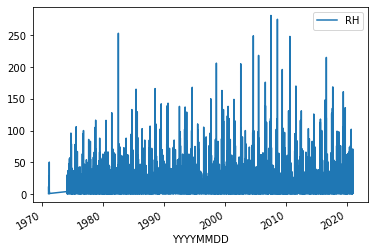

In [4]:
display(deBilt.plot(x='YYYYMMDD',y='RH'))

In [5]:
"""
Count the times a certain amount of rain occured (max time 1 hour)
"""

rainRanges = [*range(2, 10, 2), *range(10, 50, 10), *range(50, 350, 50)]
freq = {}

for year in range(deBilt['YYYYMMDD'].dt.year.min(), deBilt['YYYYMMDD'].dt.year.max()+1):
    yearRain = deBilt[deBilt['YYYYMMDD'].dt.year == year]
    counts = []
    for i, mm in enumerate(rainRanges[1:],1):
        prev = rainRanges[i-1]
        x = yearRain[(yearRain['RH'] >= prev) & (yearRain['RH'] < mm)]['RH'].count()
#         print(f'year: {year} max:{mm} count:{x}')
        counts.append(x)
    freq.update({year:counts})

fpy = pd.DataFrame.from_dict(freq, orient='index',columns=rainRanges[1:])

In [6]:
display(fpy[0:5])

,4,6,8,10,20,30,40,50,100,150,200,250,300
1971,30,29,14,11,26,4,0,0,1,0,0,0,0
1972,0,0,0,0,0,0,0,0,0,0,0,0,0
1973,0,0,0,0,0,0,0,0,0,0,0,0,0
1974,241,161,94,60,170,54,24,9,6,0,0,0,0
1975,186,120,71,64,113,43,4,6,5,2,0,0,0


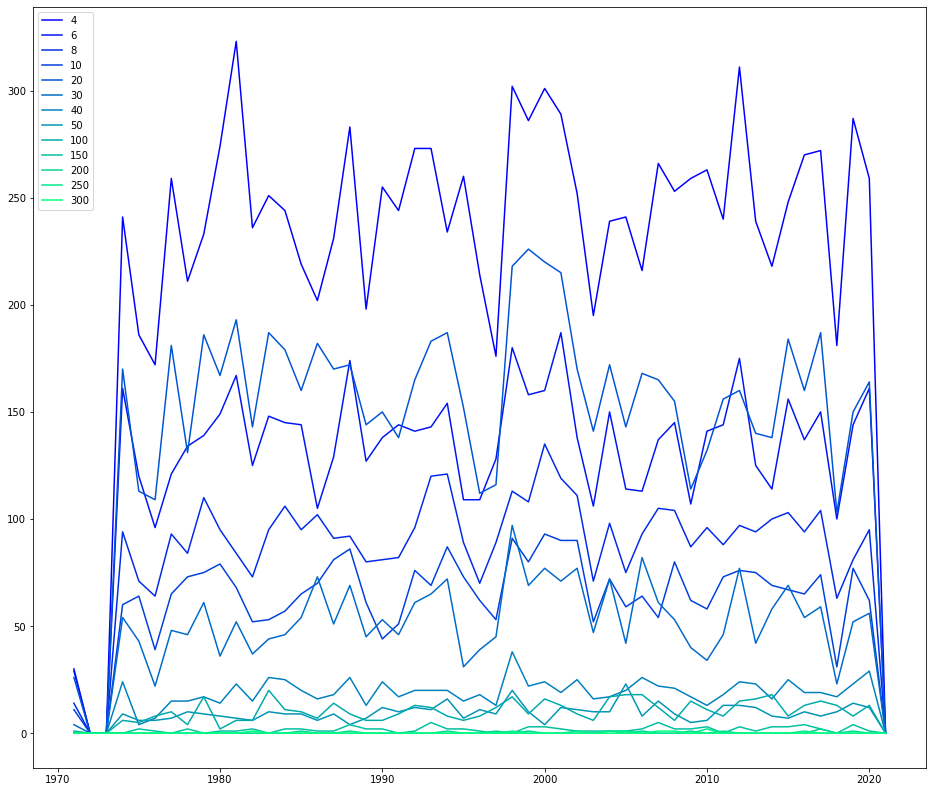

In [7]:
x = fpy.plot(figsize=(16,14),colormap="winter")

In [11]:
"""
HH: Current hour
DR: Duur van de neerslag (in 0.1 uur) per uurvak / Precipitation duration (in 0.1 hour) during the hourly division
RH: Uursom van de neerslag (in 0.1 mm) (-1 voor <0.05 mm) / Hourly precipitation amount (in 0.1 mm) (-1 for <0.05 mm)
"""
deBilt.sort_values(by=['RH','DR'],ascending=False)[:20]

,YYYYMMDD,HH,RH,DR
34676,2007-07-16,18,281,5
35805,2008-08-07,14,275,10
8484,1982-06-22,21,253,10
31605,2004-08-23,16,249,7
37861,2010-08-26,6,248,10
32501,2005-07-04,4,218,10
44410,2016-08-21,8,215,10
24607,1998-07-29,20,206,10
29711,2002-07-30,19,205,7
37841,2010-08-23,7,204,10


In [12]:
# Specifieke regen val X n maal in 50 jaar
fpy.mean()

4      227.627451
6      127.882353
8       86.764706
10      62.509804
20     148.960784
30      50.098039
40      18.000000
50       9.019608
100     10.000000
150      1.588235
200      0.235294
250      0.137255
300      0.058824
dtype: float64

In [13]:
fpy.mean() * 20

4      4552.549020
6      2557.647059
8      1735.294118
10     1250.196078
20     2979.215686
30     1001.960784
40      360.000000
50      180.392157
100     200.000000
150      31.764706
200       4.705882
250       2.745098
300       1.176471
dtype: float64

In [1]:
fpy

NameError: name 'fpy' is not defined

## Invloed klimaatverandering op regenval


We willen kijken of klimaatverandering invloed heeft op de hoeveelheid regenval. Elke 5 jaar berekenen we hieronder de gemiddeldes van RH en DR uit. We willen kijken of we kunnen aantonen dat er inderdaad meer regen valt in kortere tijd naarmate de jaren vorderen en de opwarming van de aarde verergert. 

In [15]:
df1971 = deBilt[0:148]

In [16]:
rh71 = df1971['RH']
np.mean(rh71)

6.256756756756757

In [17]:
dr71 = df1971['DR']
np.mean(dr71)

4.324324324324325

In [18]:
df1975= deBilt[149:5818]

In [19]:
rh75 = df1975['RH']
hm7580 = np.mean(rh75)

In [20]:
dr75 = df1975['DR']
dm7580 = np.mean(dr75)

In [21]:
df1980 = deBilt[5818:11197]

In [22]:
rh80 = df1980['RH']
hm8085 = np.mean(rh80)

In [23]:
dr80 = df1980['DR']
dm8085 = np.mean(dr80)

In [24]:
df1985 = deBilt[11197:16245]

In [25]:
rh85 = df1985['RH']
hm8590 = np.mean(rh85)

In [26]:
dr85 = df1985['DR']
dm8590 = np.mean(dr85)

In [27]:
df1990 = deBilt[16245:21414]

In [28]:
rh90 = df1990['RH']
hm9095 = np.mean(rh90)

In [29]:
dr90 = df1990['DR']
dm9095 = np.mean(dr90)

In [30]:
df1995 = deBilt[21414:26509]

In [31]:
rh95 = df1995['RH']
hm9500 = np.mean(rh95)

In [32]:
dr95 = df1995['DR']
dm9500 = np.mean(dr95)

In [33]:
df2000 = deBilt[26509:32060]

In [34]:
rh20 = df2000['RH']
hm0005 = np.mean(rh20)

In [35]:
dr20 = df2000['DR']
dm0005 = np.mean(dr20)

In [36]:
df2005 = deBilt[32060:37268]

In [40]:
rh05 = df2005['RH']
hm0510 = np.mean(rh05)


In [41]:
dr05 = df2005['DR']
dm0510 = np.mean(dr05)

In [42]:
df2010 = deBilt[37268:42515]

In [43]:
rh10 = df2010['RH']
hm1015 = np.mean(rh10)

In [44]:
dr10 = df2010['DR']
dm1015 = np.mean(dr10)

In [45]:
df2015 = deBilt[42515:47745]

In [46]:
rh15 = df2015['RH']
hm1520 = np.mean(rh15)

In [47]:
dr15 = df2015['DR']
dm1520 = np.mean(dr15)

In [48]:
df2020 = deBilt[47745:]

In [49]:
rh20 = df2020['RH']
hm2021 = np.mean(rh20)

In [50]:
dr20 = df2020['DR']
dm2021 = np.mean(dr20)

In [51]:
rh = [hm7580, hm8085, hm8590, hm9095, hm9500, hm0005, hm0510, hm1015, hm1520, hm2021]
dr = [dm7580, dm8085, dm8590, dm9095, dm9500, dm0005, dm0510, dm1015, dm1520, dm2021]
year = [1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]

Je verwacht dat er door de jaren heen meer neerslag gaat vallen in kortere periodes, de duratie van de buien zou dus minder moeten worden of gelijk blijven terwijl de hoeveelheid neerslag juist toe zou moeten nemen. 

Text(0.5, 1.0, 'Gemiddelde regenval + duratie elke 5 jaar')

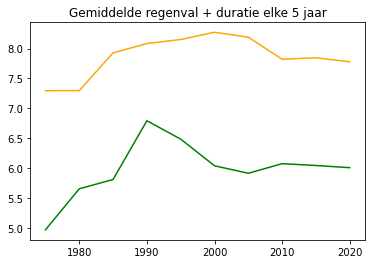

In [52]:
plt.plot(year, dr, color ='g')
plt.plot(year, rh, color = 'orange')
plt.title('Gemiddelde regenval + duratie elke 5 jaar')

In [53]:
m75 = hm7580/dm7580

In [54]:
m80 = hm8085/dm8085


In [55]:
m85 = hm8590/dm8590

In [56]:
m90 = hm9095/dm9095

In [57]:
m95 = hm9500/dm9500

In [58]:
m00 = hm0005/dm0005

In [59]:
m05 = hm0510/dm0510

In [60]:
m10 = hm1015/dm1015

In [61]:
m15 = hm1520/dm1520

In [62]:
m20 = hm2021/dm2021

In [63]:
neerslag = [m75, m80, m85, m90, m95, m00, m05, m10, m15, m20]

We hoopten aan te kunnen tonen dat er meer neerslag zal vallen naarmate de jaren vorderde en dit op die manier te kunnen koppelen aan de mileu verandering die de wereld doormaakt. Toch toont onderstaande grafiek wat anders aan namelijk: er lijkt geen duidelijke stijging of afname te bekennen van de hoeveelheid neerslag in korte tijd. 

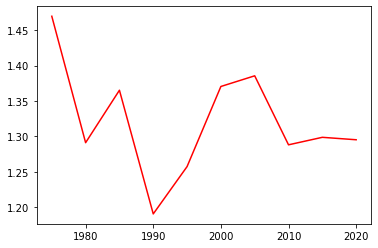

In [64]:
plt.plot(year, neerslag, color = 'r')